In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable

import catalog
import catalog_init 
import catalog_process
import catalog_plot
import copy
import imp 
import harry_plotter as hp

# plotting defaults.
from matplotlib.pyplot import rcParams
catalog_plot.default(rcParams)

#plt.style.use("dark_background")

In [7]:
basepath = '/Users/chrisduckworth/astronomy/projects/spin_bias/catalogues/'
outpath = '/Users/chrisduckworth/astronomy/projects/spin_bias/plots/final_plots/'

# initiating catalog class objects.
ltgs = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)
ltgs.select_morphology('ltg')

# matching to cw definitions and selecting centrals only.
ltgs.match_to_cw(basepath, version='mpl9', sigma=3)
ltgs_cen = copy.deepcopy(ltgs) 
ltgs_sat = copy.deepcopy(ltgs)

ltgs.group_membership(sel='all') # to establish stellar to halo ratio
ltgs_cen.group_membership(sel='cen', group_cat='lim') 
ltgs_sat.group_membership(sel='sat', group_cat='lim') 

In [8]:
# finding rolling mean for populations.
fraction = 0.1 # rolling mean contains 5% of ltgs points.

# finding rolling mean of stellar mass.
p_stel_ltgs = ltgs.compute_expected_y('log_halo_mass', 'nsa_elpetro_mass_logscale', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs.df.shape[0]))
x_stel_ltgs = np.linspace(ltgs.df.log_halo_mass.min(), ltgs.df.log_halo_mass.max())

p_stel_ltgs_cen = ltgs_cen.compute_expected_y('log_halo_mass', 'nsa_elpetro_mass_logscale', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs_cen.df.shape[0]))
x_stel_ltgs_cen = np.linspace(ltgs_cen.df.log_halo_mass.min(), ltgs_cen.df.log_halo_mass.max())

p_stel_ltgs_sat = ltgs_sat.compute_expected_y('log_halo_mass', 'nsa_elpetro_mass_logscale', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs_sat.df.shape[0]))
x_stel_ltgs_sat = np.linspace(ltgs_sat.df.log_halo_mass.min(), ltgs_sat.df.log_halo_mass.max())

# finding rolling mean of lambda_R
p_lambdaR_ltgs = ltgs.compute_expected_y('log_halo_mass', 'Lambda_Re', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs.df.shape[0]))
x_lambdaR_ltgs = np.linspace(ltgs.df.log_halo_mass.min(), ltgs.df.log_halo_mass.max())

p_lambdaR_ltgs_cen = ltgs_cen.compute_expected_y('log_halo_mass', 'Lambda_Re', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs_cen.df.shape[0]))
x_lambdaR_ltgs_cen = np.linspace(ltgs_cen.df.log_halo_mass.min(), ltgs_cen.df.log_halo_mass.max())

p_lambdaR_ltgs_sat = ltgs_sat.compute_expected_y('log_halo_mass', 'Lambda_Re', method="running_mean", return_plot=False, plot_x_extent=[11, 15], plot_y_extent=[8.5, 11.5], n_neighbours=int(fraction*ltgs_sat.df.shape[0]))
x_lambdaR_ltgs_sat = np.linspace(ltgs_sat.df.log_halo_mass.min(), ltgs_sat.df.log_halo_mass.max())

### Plot coloured on $\lambda_R$, residuals shown for Mstel.
- Individually for each of all galaxies, centrals and satellites.

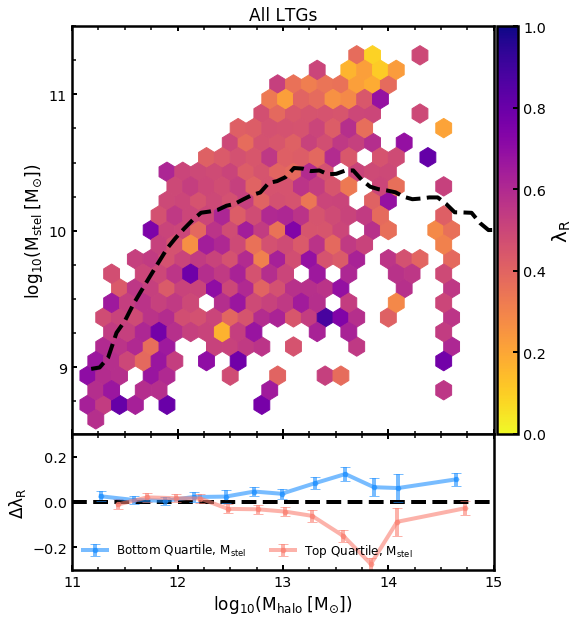

In [9]:
# ltgs population.
extent = [11, 14.75, 8.51, 11.5]
grid = 25
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('All LTGs', fontsize=17)
hb = ltgs.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs, p_stel_ltgs(x_stel_ltgs), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14.25, 11)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.3, 0.3])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_all_scatter_mstel_residual.pdf', format='pdf', bbox_inches='tight')


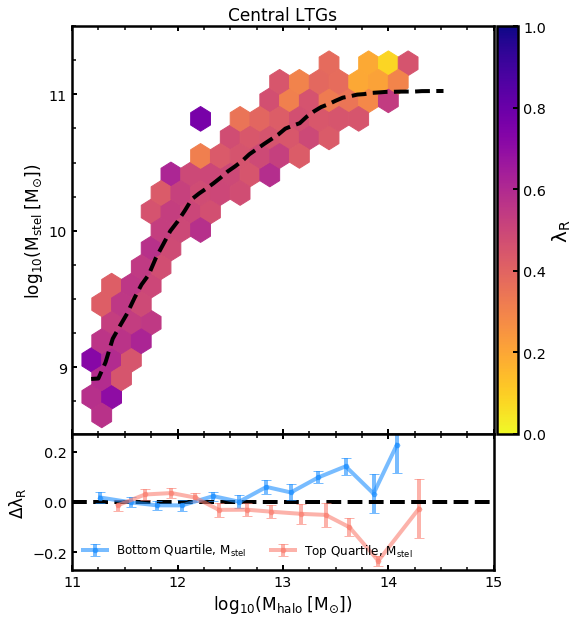

In [10]:
# ltgs_cen population.
extent = [11, 14.75, 8.51, 11.5]
grid = 20
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('Central LTGs', fontsize=17)
hb = ltgs_cen.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs_cen.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs_cen, p_stel_ltgs_cen(x_stel_ltgs_cen), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14, 11)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs_cen.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs_cen, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.27, 0.27])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_cen_all_scatter_mstel_residual.pdf', format='pdf', bbox_inches='tight')


/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


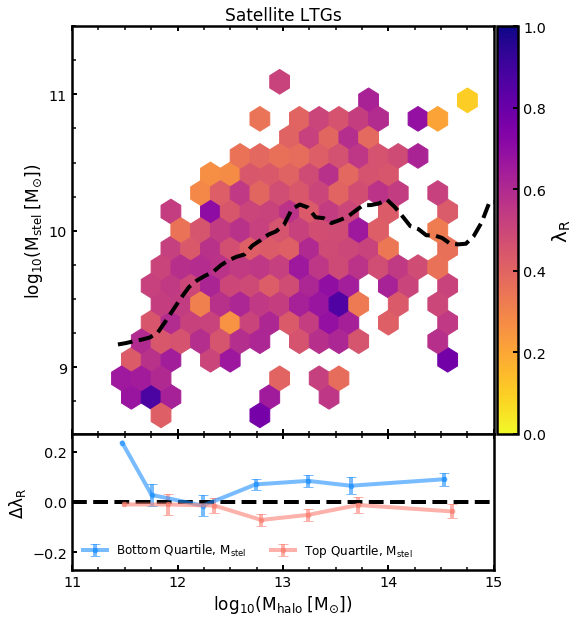

In [15]:
# ltgs_sat population.
extent = [11, 14.75, 8.51, 11.5]
grid = 20
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('Satellite LTGs', fontsize=17)
hb = ltgs_sat.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs_sat.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs_sat, p_stel_ltgs_sat(x_stel_ltgs_sat), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14, 6)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs_sat.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "nsa_elpetro_mass", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs_sat, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.27, 0.27])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_sat_all_scatter_mstel_residual.pdf', format='pdf', bbox_inches='tight')


### Plot coloured on $\lambda_R$, residuals shown for $M_{stel} / M_{halo}$ 
- Individually for each of all galaxies, centrals and satellites.

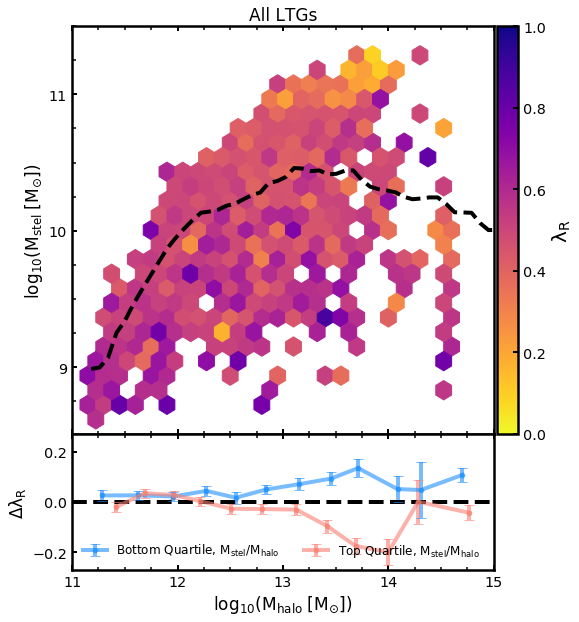

In [11]:
# ltgs population.
extent = [11, 14.75, 8.51, 11.5]
grid = 25
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('All LTGs', fontsize=17)
hb = ltgs.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs, p_stel_ltgs(x_stel_ltgs), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14.5, 11)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}/M_{halo}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}/M_{halo}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.27, 0.27])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_all_scatter_ratio_residual.pdf', format='pdf', bbox_inches='tight')


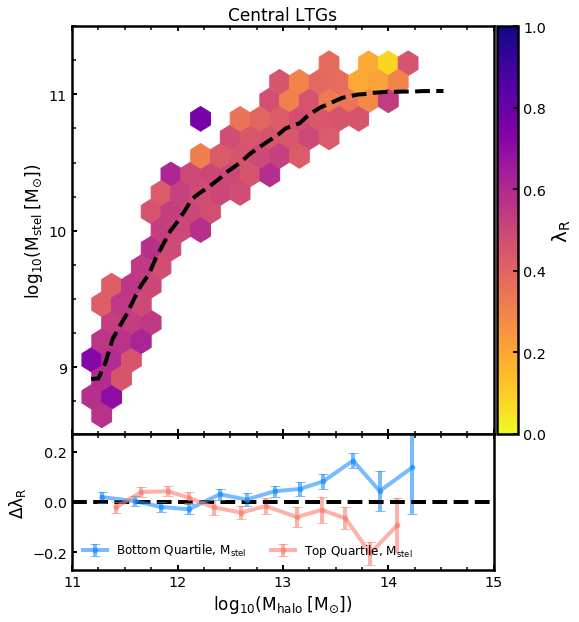

In [13]:
# ltgs_cen population.
extent = [11, 14.75, 8.51, 11.5]
grid = 20
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('Central LTGs', fontsize=17)
hb = ltgs_cen.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs_cen.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs_cen, p_stel_ltgs_cen(x_stel_ltgs_cen), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14, 11)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs_cen.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs_cen, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.27, 0.27])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_cen_all_scatter_ratio_residual.pdf', format='pdf', bbox_inches='tight')


/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


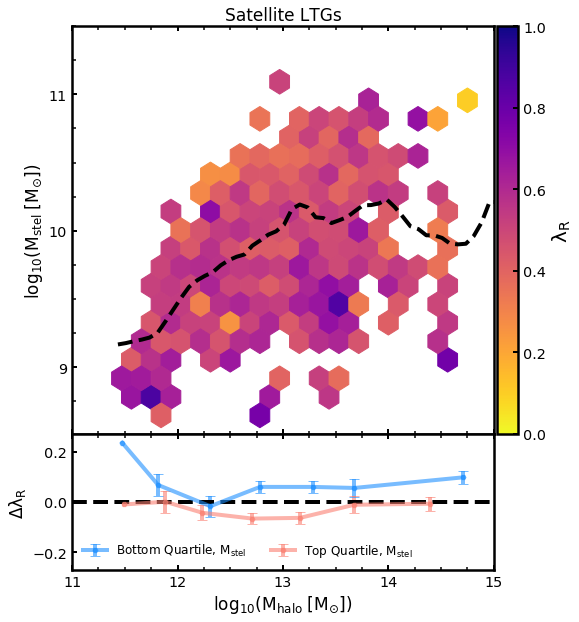

In [14]:
# ltgs_sat population.
extent = [11, 14.75, 8.51, 11.5]
grid = 20
mincnt = 1


# Hexbin plot
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(8,10), gridspec_kw={'height_ratios': [3, 1]})
ax1.set_title('Satellite LTGs', fontsize=17)
hb = ltgs_sat.plot_hexbin('log_halo_mass', 'nsa_elpetro_mass_logscale', ax1, C=ltgs_sat.df.Lambda_Re.values, mincnt=mincnt, gridsize=grid, extent=extent, cmap='plasma_r', vmin=0, vmax=1)
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=.05)
cb = plt.colorbar(hb, cax=cax)
cb.set_label('$\mathrm{\lambda_R}$', fontsize=20)
ax1.plot(x_stel_ltgs_sat, p_stel_ltgs_sat(x_stel_ltgs_sat), color='k', linewidth=4, linestyle='dashed') 
ax1.set_ylabel("$\mathrm{log_{10}(M_{stel} \; [M_{\odot}])}$", fontsize=17)
hp.xtick_format(1, 0.25, ax1)
hp.ytick_format(1, 0.25, ax1)


# Residual plot
x_bins = np.linspace(11.5, 14, 6)
z_percentiles = np.array([25, 50, 75]) 
z_percentile_labels = ['Bottom Quartile, $\mathrm{M_{stel}}$', 'Q2 $\mathrm{M_{stel}/M_{halo}}$', 'Q3 $\mathrm{M_{stel}/M_{halo}}$', 'Top Quartile, $\mathrm{M_{stel}}$']
ax2.axhline(0, color='k', linestyle='dashed', linewidth=4)

ltgs_sat.plot_binned_percentiles_three_props_residuals("log_halo_mass", "Lambda_Re", "stellar_to_halo_ratio", x_bins, z_percentiles, z_percentile_labels, p_lambdaR_ltgs_sat, ax2, colors=['dodgerblue', 'k', 'k', 'salmon'], extrema=True)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=.05)
cax2.remove()

ax2.set_ylabel("$\mathrm{\Delta\lambda_R}$", fontsize=17)
ax2.set_xlabel("$\mathrm{log_{10}(M_{halo} \; [M_{\odot}])}$", fontsize=17)
ax2.legend(frameon=False, fontsize=12, ncol=2, loc='lower left')
ax2.set_ylim([-0.27, 0.27])
ax2.set_xlim([11, 15])

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig(outpath+'ltgs_sat_all_scatter_ratio_residual.pdf', format='pdf', bbox_inches='tight')
